# 🎢 Visualización de Algoritmos de Ordenamiento

En este cuaderno exploraremos cómo se comporta el algoritmo **Bubble Sort** al ordenar listas pequeñas y grandes.

Veremos:

- Comparación del número de comparaciones e intercambios.
- Medición de tiempo con `time`.
- Visualización con `matplotlib`.
- Uso de `tqdm` para mostrar progreso.
- Visualización de burbujas en movimiento en una animación paso a paso.

---


## 🛠️ Configuración Inicial

In [ ]:
# Importamos el módulo 'random' para generar listas de números aleatorios
import random

# Importamos 'time' para medir el tiempo de ejecución de los algoritmos
import time

# Importamos 'matplotlib.pyplot' como 'plt' para crear gráficos y visualizar resultados
import matplotlib.pyplot as plt

# Importamos 'tqdm' para mostrar barras de progreso mientras se ejecutan ciclos largos
from tqdm import tqdm

# Importamos 'clear_output' desde IPython.display para limpiar la salida en consola o en Jupyter
# Esto es útil para crear animaciones que actualizan la misma celda repetidamente
from IPython.display import clear_output

# También importamos el módulo 'time' con un alias 't' para usarlo independientemente si lo necesitamos
# (por ejemplo, usar t.sleep(0.3) en lugar de time.sleep(0.3) si queremos evitar conflictos o duplicación)
import time as t


## 🔄 Bubble Sort con estadísticas y visualización

In [6]:
# Definimos la función bubble_sort_viz, que implementa Bubble Sort con estadísticas y opción de visualización
# Parámetros:
# - lista: la lista de números a ordenar
# - mostrar_pasos (bool): si es True, se guardarán los estados intermedios para animación
# - pausa (float): tiempo en segundos entre pasos, útil si se usa para animar (aunque aquí no se usa directamente)
def bubble_sort_viz(lista, mostrar_pasos=False, pausa=0.3):

    # Creamos una copia de la lista para no modificar la original
    lista = lista.copy()

    # Inicializamos contadores para registrar la cantidad de comparaciones e intercambios
    comparaciones = 0
    intercambios = 0

    # Guardamos la longitud de la lista
    n = len(lista)

    # Lista donde se almacenarán los pasos intermedios (solo si mostrar_pasos=True)
    pasos = []

    # Bucle externo que recorre toda la lista
    for i in range(n):
        # Bucle interno que compara elementos adyacentes
        for j in range(0, n - i - 1):
            # Cada vez que se comparan dos elementos, se incrementa el contador de comparaciones
            comparaciones += 1

            # Si el elemento actual es mayor que el siguiente, se deben intercambiar
            if lista[j] > lista[j + 1]:
                # Intercambio de los elementos
                lista[j], lista[j + 1] = lista[j + 1], lista[j]

                # Incrementamos el contador de intercambios
                intercambios += 1

                # Si mostrar_pasos es True, guardamos el estado actual de la lista (después del intercambio)
                pasos.append(lista.copy())

    # Al finalizar, retornamos:
    # - La lista ordenada
    # - El número total de comparaciones
    # - El número total de intercambios
    # - La lista de pasos intermedios (puede estar vacía si mostrar_pasos=False)
    return lista, comparaciones, intercambios, pasos


## 📏 Comparación de rendimiento en listas grandes

In [7]:
# ✅ Probamos el algoritmo Bubble Sort con listas de distintos tamaños
tamaños = [10, 50, 100, 200]  # Lista con diferentes tamaños de entrada que vamos a probar

# Lista donde almacenaremos los resultados (comparaciones, intercambios y tiempo por tamaño)
resultados = []

# Usamos tqdm para mostrar una barra de progreso mientras se ejecuta el ciclo
for tam in tqdm(tamaños):

    # Generamos una lista aleatoria de 'tam' elementos, sin repetidos, en un rango proporcional
    lista = random.sample(range(1, tam * 10), tam)

    # Medimos el tiempo justo antes de ejecutar el algoritmo
    inicio = time.time()

    # Ejecutamos bubble_sort_viz pero no nos interesa la lista final ni los pasos,
    # solo las estadísticas de comparaciones e intercambios
    _, comp, interc, _ = bubble_sort_viz(lista)

    # Medimos el tiempo al finalizar
    fin = time.time()

    # Guardamos los resultados en un diccionario y lo añadimos a la lista de resultados
    resultados.append({
        'Tamaño': tam,
        'Comparaciones': comp,
        'Intercambios': interc,
        'Tiempo (s)': round(fin - inicio, 4)  # Redondeamos a 4 decimales para mayor claridad
    })

# 📊 Visualización de los resultados
# Usamos pandas para crear una tabla (DataFrame) con los resultados obtenidos
import pandas as pd
df = pd.DataFrame(resultados)

# Mostramos la tabla
df


100%|██████████| 4/4 [00:00<00:00, 75.00it/s]


,Tamaño,Comparaciones,Intercambios,Tiempo (s)
0,10,45,22,0.0000
1,50,1225,637,0.0000
2,100,4950,2511,0.0067
3,200,19900,10610,0.0456


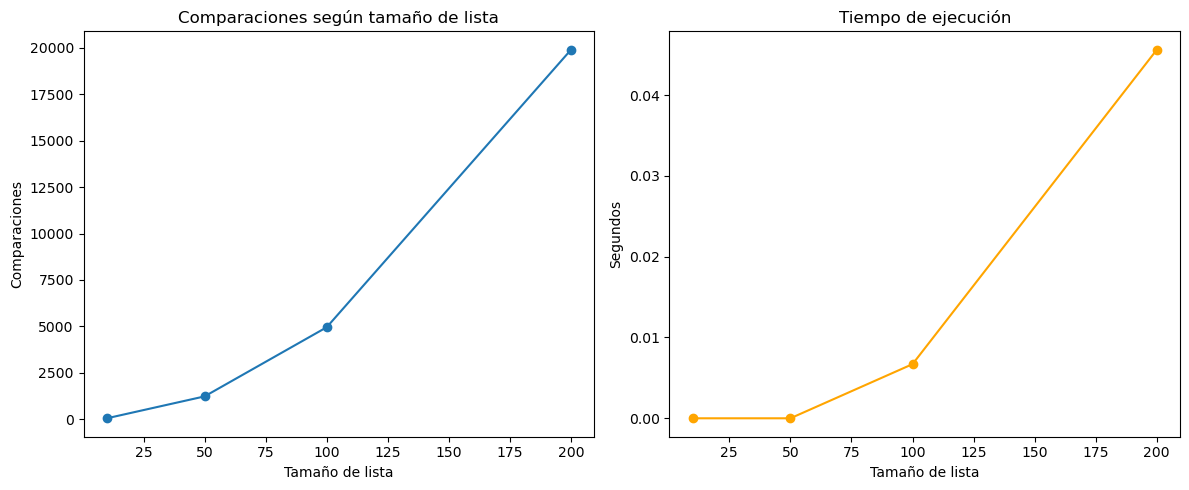

In [ ]:
# 📈 Gráfica de Comparaciones y Tiempo de Ejecución

# Creamos una figura con un tamaño personalizado de 12x5 pulgadas
plt.figure(figsize=(12,5))

# --------- Subgráfico 1: Comparaciones ---------
# Especificamos que este es el primer subplot (1 fila, 2 columnas, posición 1)
plt.subplot(1, 2, 1)

# Graficamos los tamaños de lista (eje x) contra el número de comparaciones (eje y)
plt.plot(df['Tamaño'], df['Comparaciones'], marker='o')

# Título y etiquetas del primer gráfico
plt.title('Comparaciones según tamaño de lista')
plt.xlabel('Tamaño de lista')
plt.ylabel('Comparaciones')

# --------- Subgráfico 2: Tiempo de ejecución ---------
# Especificamos que este es el segundo subplot (1 fila, 2 columnas, posición 2)
plt.subplot(1, 2, 2)

# Graficamos los tamaños de lista contra el tiempo que tardó Bubble Sort en ejecutarse
plt.plot(df['Tamaño'], df['Tiempo (s)'], marker='o', color='orange')

# Título y etiquetas del segundo gráfico
plt.title('Tiempo de ejecución')
plt.xlabel('Tamaño de lista')
plt.ylabel('Segundos')

# Ajustamos el diseño automáticamente para que los subgráficos no se sobrepongan
plt.tight_layout()

# Mostramos los gráficos en pantalla
plt.show()


## 🎥 Animación: Visualización paso a paso de Bubble Sort

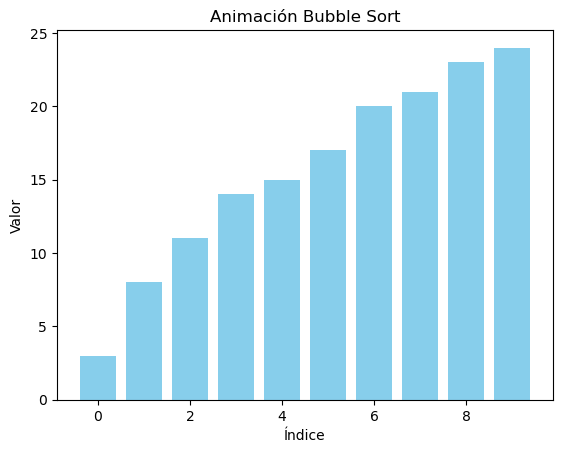

In [ ]:
# 🎥 Función para animar Bubble Sort paso a paso
def animar_bubble_sort(pasos):
    # Recorremos cada estado intermedio guardado del algoritmo
    for estado in pasos:
        # Limpiamos la salida anterior de la celda para simular una animación continua
        clear_output(wait=True)

        # Dibujamos una gráfica de barras representando el estado actual de la lista
        plt.bar(range(len(estado)), estado, color='skyblue')

        # Agregamos título y etiquetas a la gráfica
        plt.title("Animación Bubble Sort")
        plt.xlabel("Índice")  # Eje X representa las posiciones de la lista
        plt.ylabel("Valor")   # Eje Y representa el valor de cada elemento

        # Pausamos por 0.3 segundos antes de pasar al siguiente paso para que se vea el movimiento
        plt.pause(0.3)

    # Al finalizar, mostramos la última imagen sin limpiar
    plt.show()


# 🧪 Creamos una lista pequeña de 10 elementos aleatorios entre 1 y 30 para que la animación sea clara
lista_demo = random.sample(range(1, 30), 10)

# Ejecutamos bubble_sort_viz con mostrar_pasos=True para capturar cada paso intermedio
_, _, _, pasos_animacion = bubble_sort_viz(lista_demo, mostrar_pasos=True)

# Llamamos a la función de animación con los pasos registrados
animar_bubble_sort(pasos_animacion)
